一般に
$$\begin{equation}
G(i\omega_n)=\int_{-\infty}^{\infty}d\epsilon' \frac{\rho(\epsilon')}{i\omega_n-\epsilon'}
\tag{5}
\end{equation}$$
が成立。  
(1)式は
$$\rho(\epsilon')=\delta(\epsilon'-\epsilon)$$
の場合。  
今度は、
$$\rho(\epsilon')=\sqrt{4-\epsilon'^2}$$
とした場合を考える。  
これは半径２の半円であり $\epsilon'<-2$ および $\epsilon'>2$ では $\rho(\epsilon')=0$とする。  
このとき(5)式は（積分範囲に注目）
$$\begin{eqnarray}
G(i\omega_n) &=& \int_{-2}^{2}d\epsilon' \frac{\rho(\epsilon')}{i\omega_n-\epsilon'} \\
&=& \int_{-1}^{1}2dx \frac{\rho(2x)}{i\omega_n-2x} \\
&=& 4\int_{-1}^{1}dx \frac{\sqrt{1-x^2}}{i\omega_n-2x}
\tag{6}
\end{eqnarray}$$
(6)をガウスルジャンドルで数値積分する。

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import 数値積分 as my_int
help(my_int.int_gauss)

Help on function int_gauss in module 数値積分:

int_gauss(func, a, b, n)
    int_gauss(func,a,b,n)
    渡された関数funcをガウス・ルジャンドル積分した結果を返す。
    a,bはそれぞれ積分の下端と上端。nは分割数。



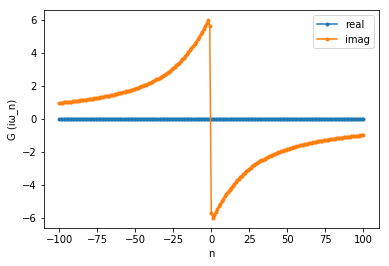

In [29]:
n_w = np.arange(-100,101)      # グラフに表示するnの範囲を設定
beta = 100                     #βの大きさを設定
G_iw_gauss = np.empty((len(n_w),),dtype=np.complex)
for n in n_w :
    w = np.pi*(2*n+1)/beta       # 松原周波数ω_nを設定
    func = lambda x : 4*np.sqrt(1-x**2)/(w*1j-2*x)
    G_iw_gauss[n+len(n_w)//2] = my_int.int_gauss(func,-1,1,100)

plt.plot(n_w, G_iw_gauss.real, label='real', marker='.')
plt.plot(n_w, G_iw_gauss.imag, label='imag', marker='.')
plt.xlabel('n')
plt.ylabel('G (iω_n)')
plt.legend()
plt.show()

次に、同じことをガウス・ルジャンドルでなく2重指数関数型積分で行う。

In [18]:
help(my_int.int_DE)

Help on function int_DE in module 数値積分:

int_DE(func, a, b, n, N)
    int_DE(func,a,b,n,N)
    渡された関数funcを2重指数関数型積分した結果を返す。
    a,bはそれぞれ積分の下端と上端。nは分割数。和の範囲は第N項で打ち切る。



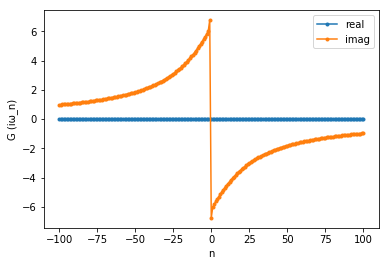

In [31]:
G_iw_DE = np.empty((len(n_w),),dtype=np.complex)
for n in n_w :
    w = np.pi*(2*n+1)/beta       # 松原周波数ω_nを設定
    func = lambda x : 4*np.sqrt(1-x**2)/(w*1j-2*x)
    G_iw_DE[n+len(n_w)//2] = my_int.int_DE(func,-1,1,100,100)

plt.plot(n_w, G_iw_DE.real, label='real', marker='.')
plt.plot(n_w, G_iw_DE.imag, label='imag', marker='.')
plt.xlabel('n')
plt.ylabel('G (iω_n)')
plt.legend()
plt.show()